In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Import the dataset [cite: 8]
df = pd.read_csv('Housing.csv')

# Explore basic info
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

# Preprocessing: Check for nulls [cite: 8]
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 e

In [17]:
# Define features (X) and target (y)
X = df[['area']]  # Using 'area' as the feature
y = df['price']  # Using 'price' as the target

# 2. Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")


Training set has 436 samples
Testing set has 109 samples


In [11]:
# Create a Linear Regression model instance
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("\nModel training complete!")


Model training complete!


In [19]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R-squared (R²): 0.27


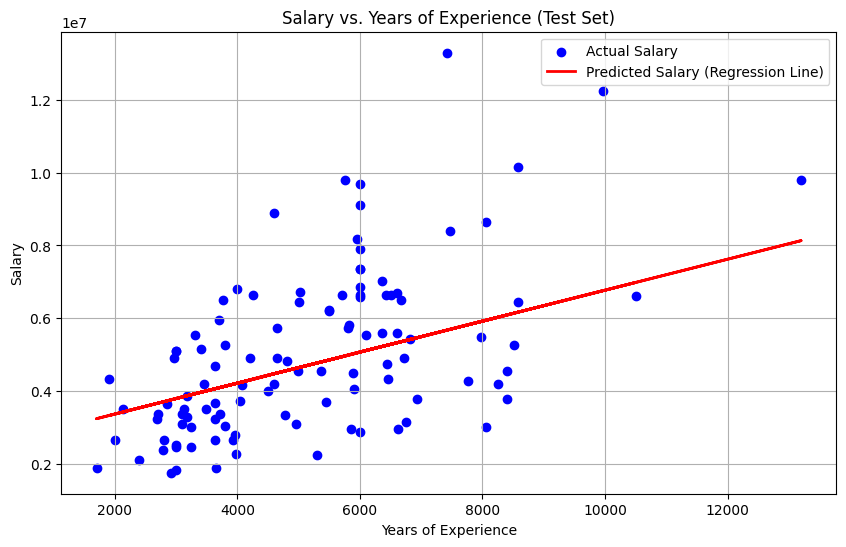


Model Interpretation:
Coefficient (Slope): 425.73
Intercept: 2512254.26


In [21]:
# 5. Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary (Regression Line)')
plt.title('Salary vs. Years of Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# 5. Interpret the coefficients
coefficient = model.coef_[0]
intercept = model.intercept_

print("\nModel Interpretation:")
print(f"Coefficient (Slope): {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")